In [2]:
import pandas as pd
import numpy as np
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
# Read the file
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

apps = apps_with_duplicates.drop_duplicates()

print('Total number of apps in the dataset = ', len(apps))
print(apps.sample(5))

Total number of apps in the dataset =  9659
      Unnamed: 0                              App  ... Current Ver   Android Ver
5268        6268                            BI-LO  ...       2.0.0    4.1 and up
446          516  Sudy – Meet Elite & Rich Single  ...       4.1.2  4.0.3 and up
7842        8961                      MelifeCam-M  ...   R1.3.21.3    4.1 and up
3340        4212              Add-On: Alcatel (h)  ...   10.0.3148    4.0 and up
4317        5271                      Aj Di Awaaz  ...           1    4.1 and up

[5 rows x 14 columns]


In [4]:
# Clean the data
chars_to_remove = ['+','$',',']
cols_to_clean = ['Installs','Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Convert data type to float
apps['Installs'] = apps['Installs'].astype(float)
apps['Price'] = apps['Price'].astype(float)

print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None


In [13]:
# Find the total number of each category
num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

num_apps_in_category = apps['Category'].value_counts()

sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, 
        y = num_apps_in_category.values, 
)]

plotly.offline.iplot(data)

Number of categories =  33


In [6]:
# Distribution of app ratings
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

data = [go.Histogram(
        x = apps['Rating']
)]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


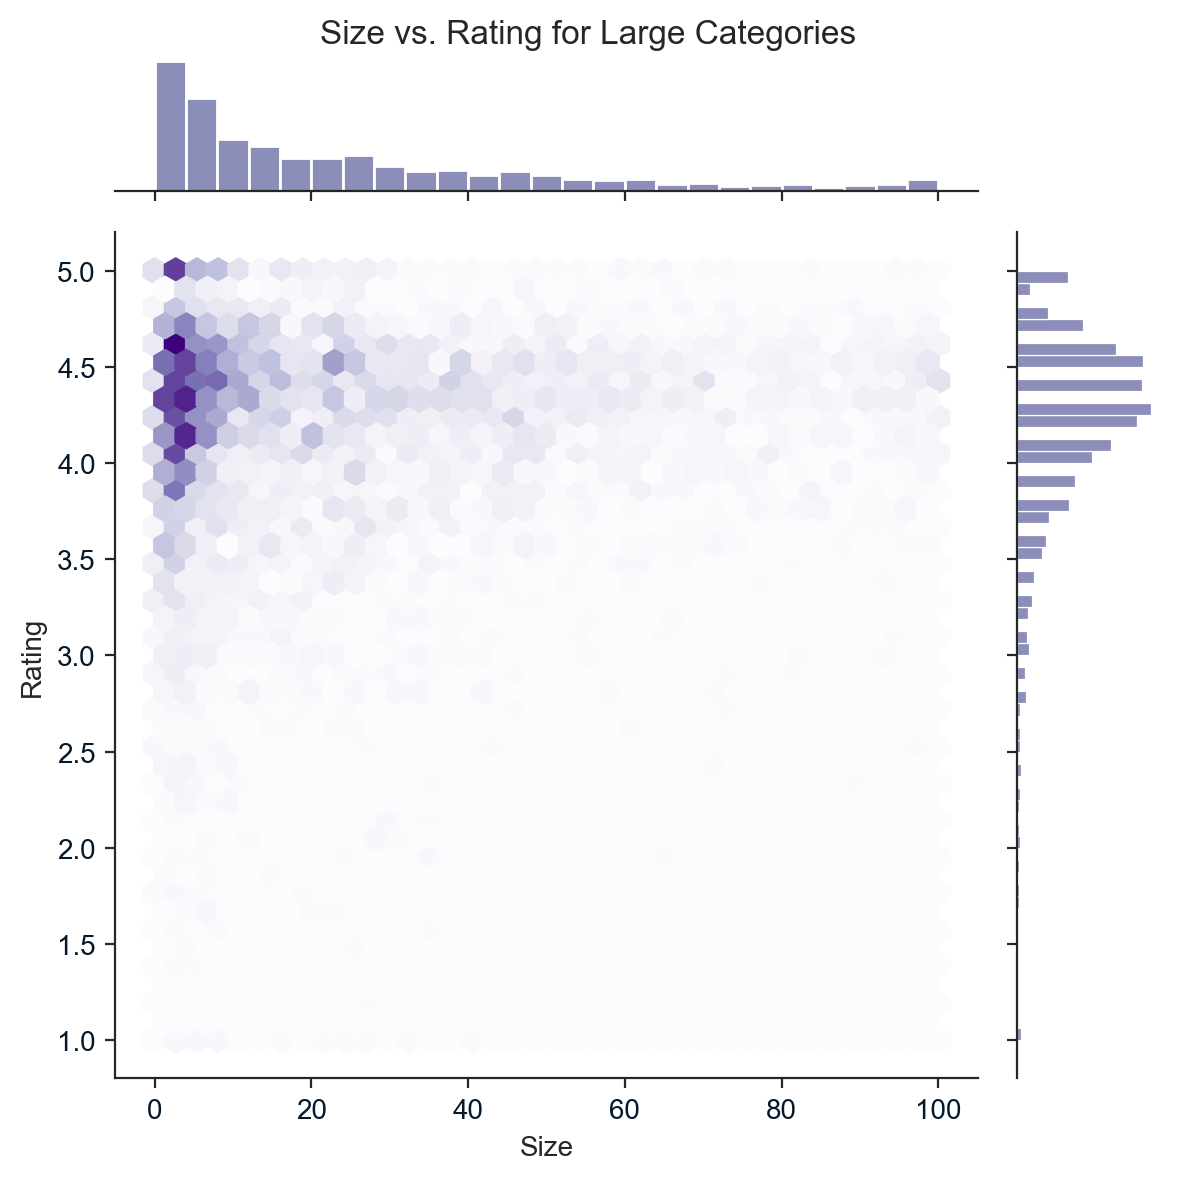

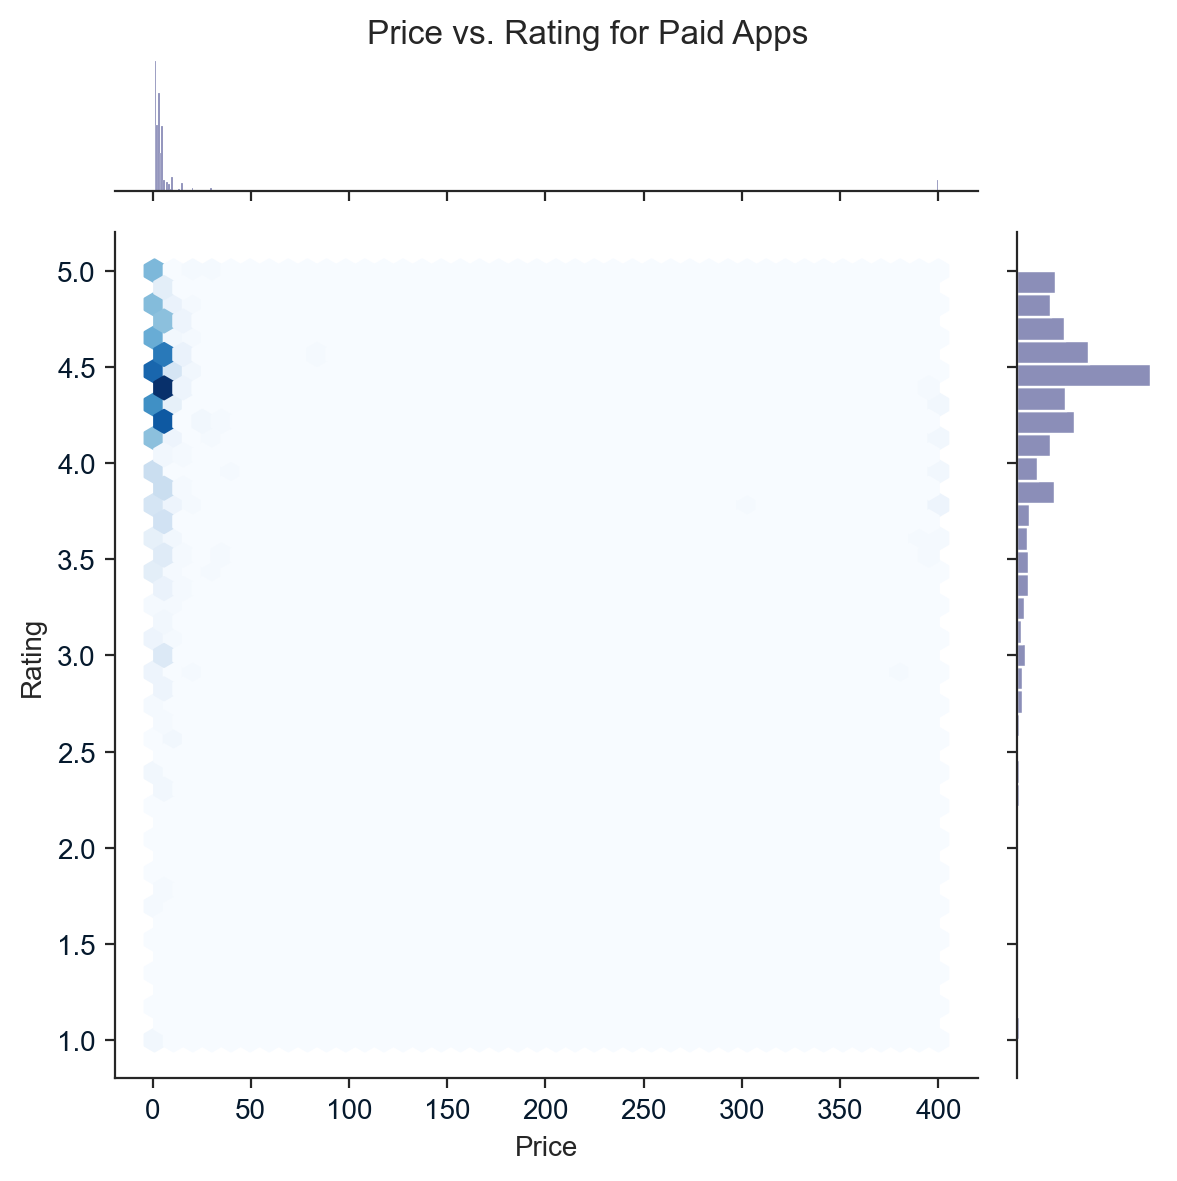

In [24]:
apps_with_size_and_rating_present = apps.dropna(subset = ['Rating','Size'])

large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)
# Plot size vs. rating
plt1 = sns.jointplot(x=large_categories['Size'], y=large_categories['Rating'], kind="hex", cmap="Purples")
plt1.set_axis_labels('Size', 'Rating')
plt1.fig.suptitle('Size vs. Rating for Large Categories')
plt1.fig.tight_layout()
plt1.fig.subplots_adjust(top=0.95)

paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
# Plot price vs. rating
plt2 = sns.jointplot(x=paid_apps['Price'], y=paid_apps['Rating'], kind="hex", cmap="Blues")
plt2.set_axis_labels('Price', 'Rating')
plt2.fig.suptitle('Price vs. Rating for Paid Apps')
plt2.fig.tight_layout()
plt2.fig.subplots_adjust(top=0.95)

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


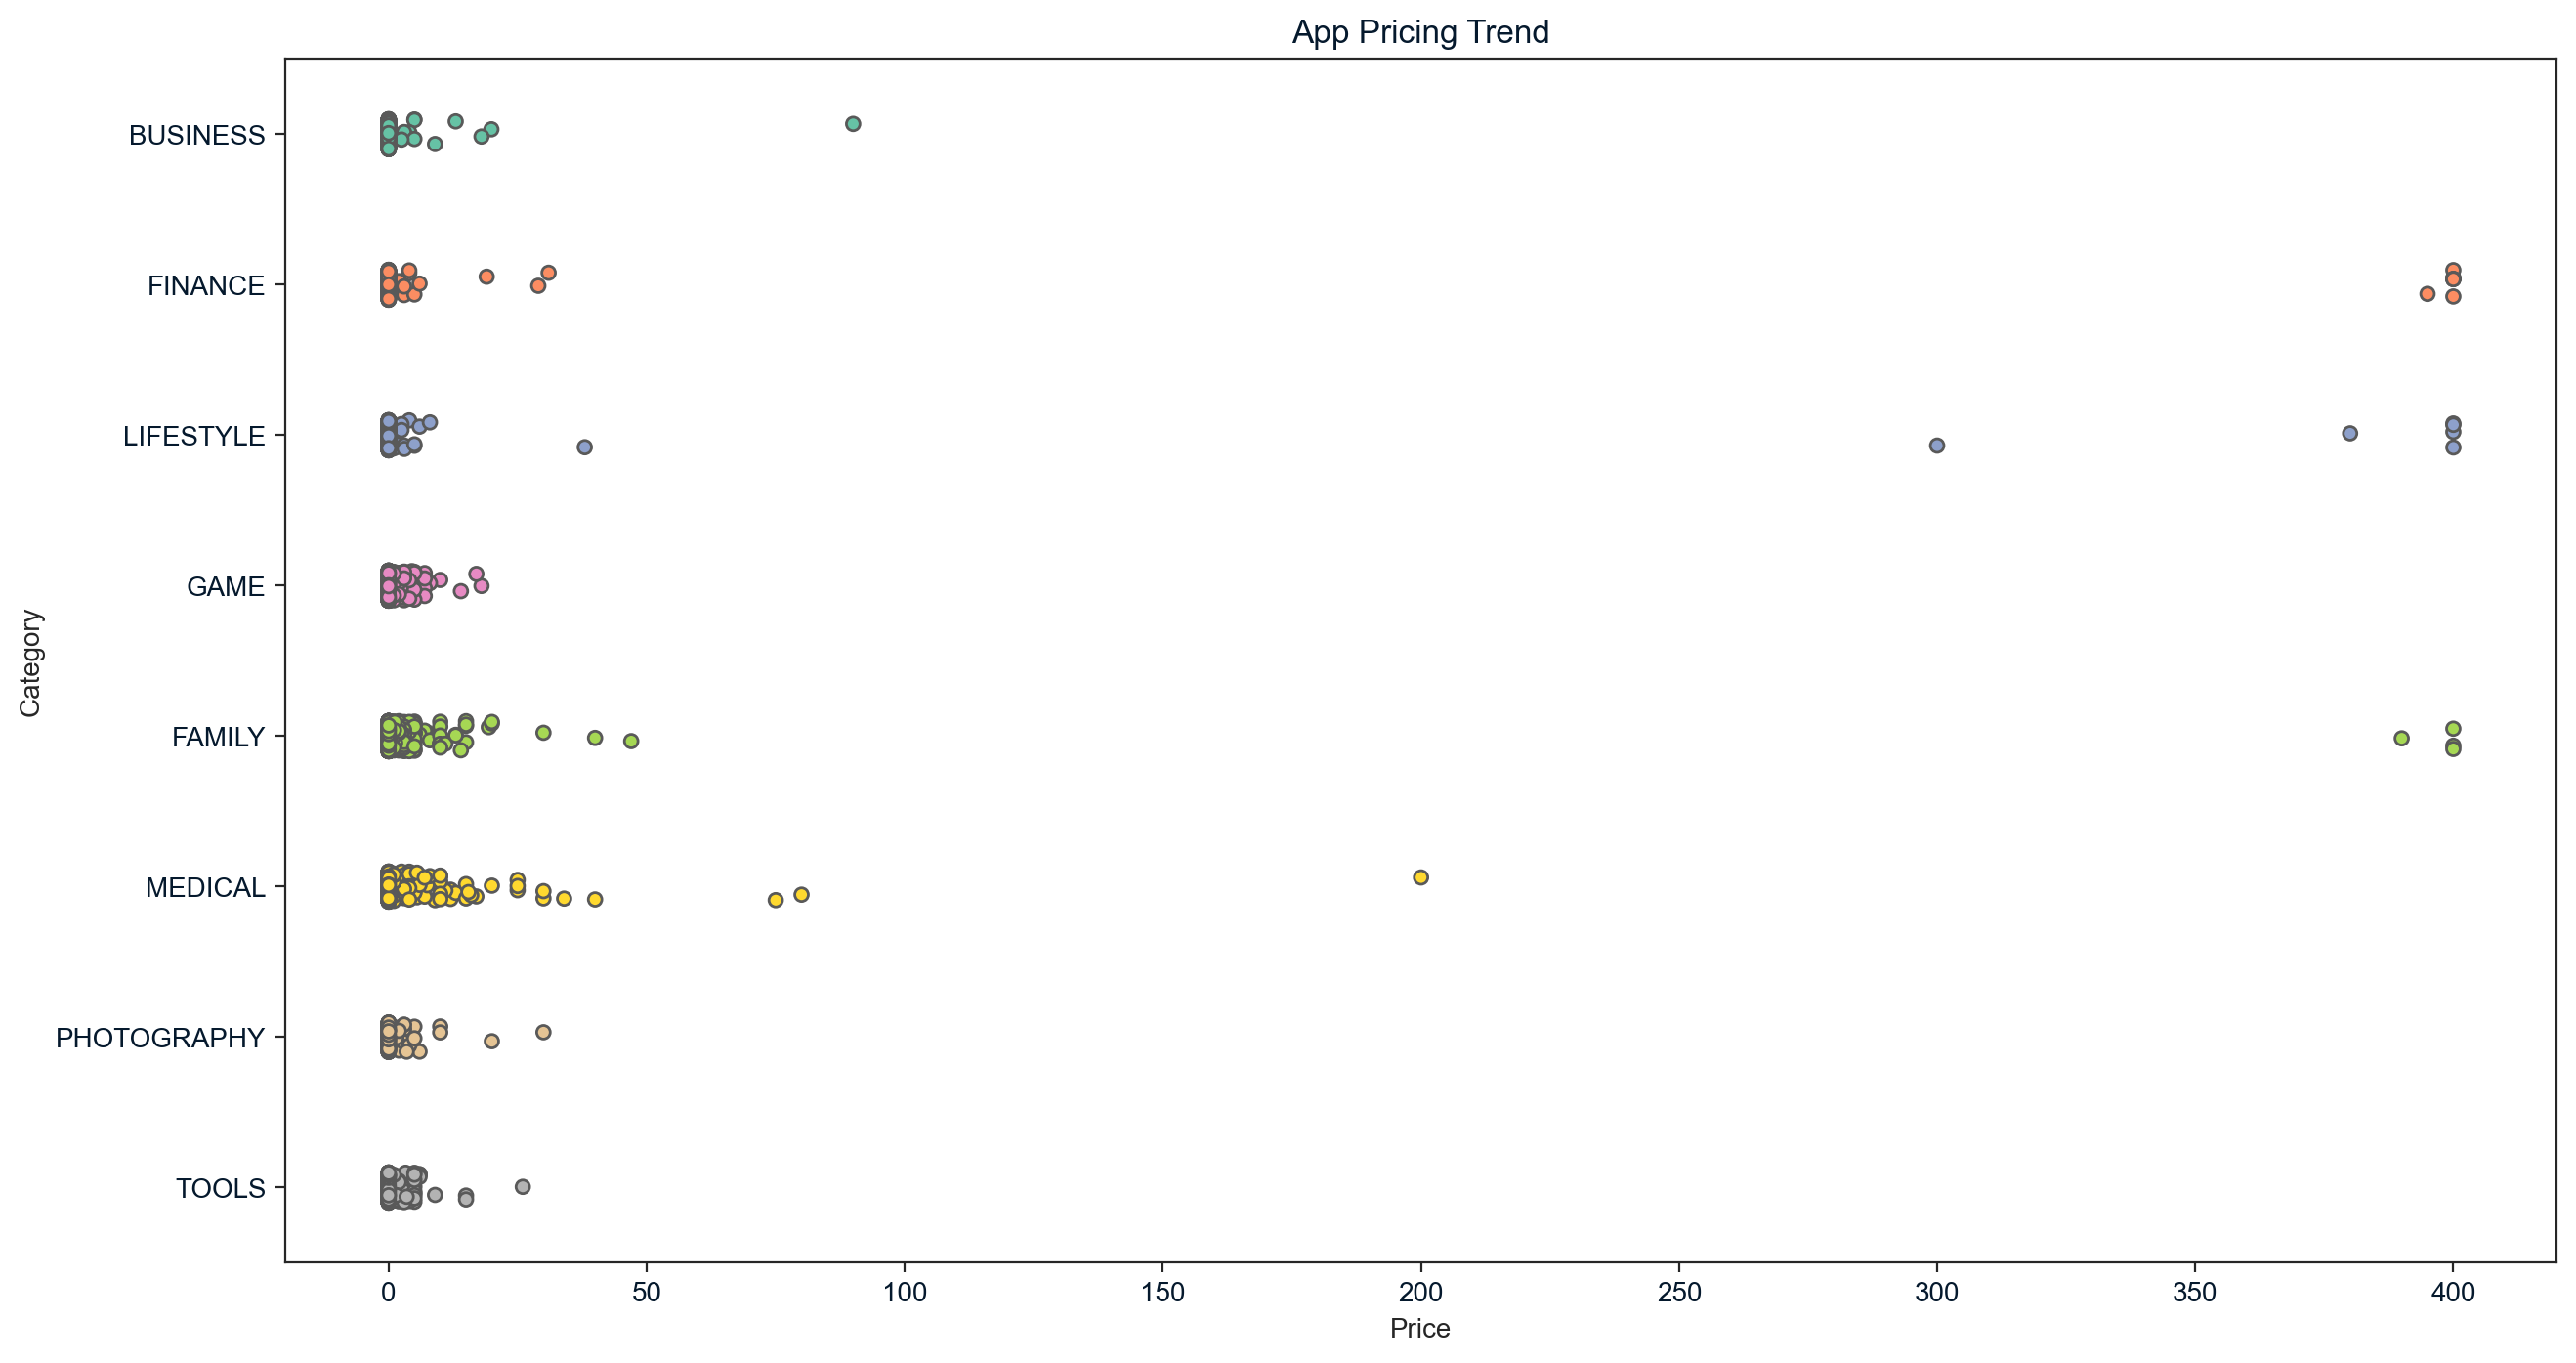

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Data visualization of price trend
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats, jitter=True, linewidth=1, palette='Set2')
ax.set_title('App Pricing Trend')

apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

Text(0.5, 1.0, 'App Pricing Trend (filtered out junk apps)')

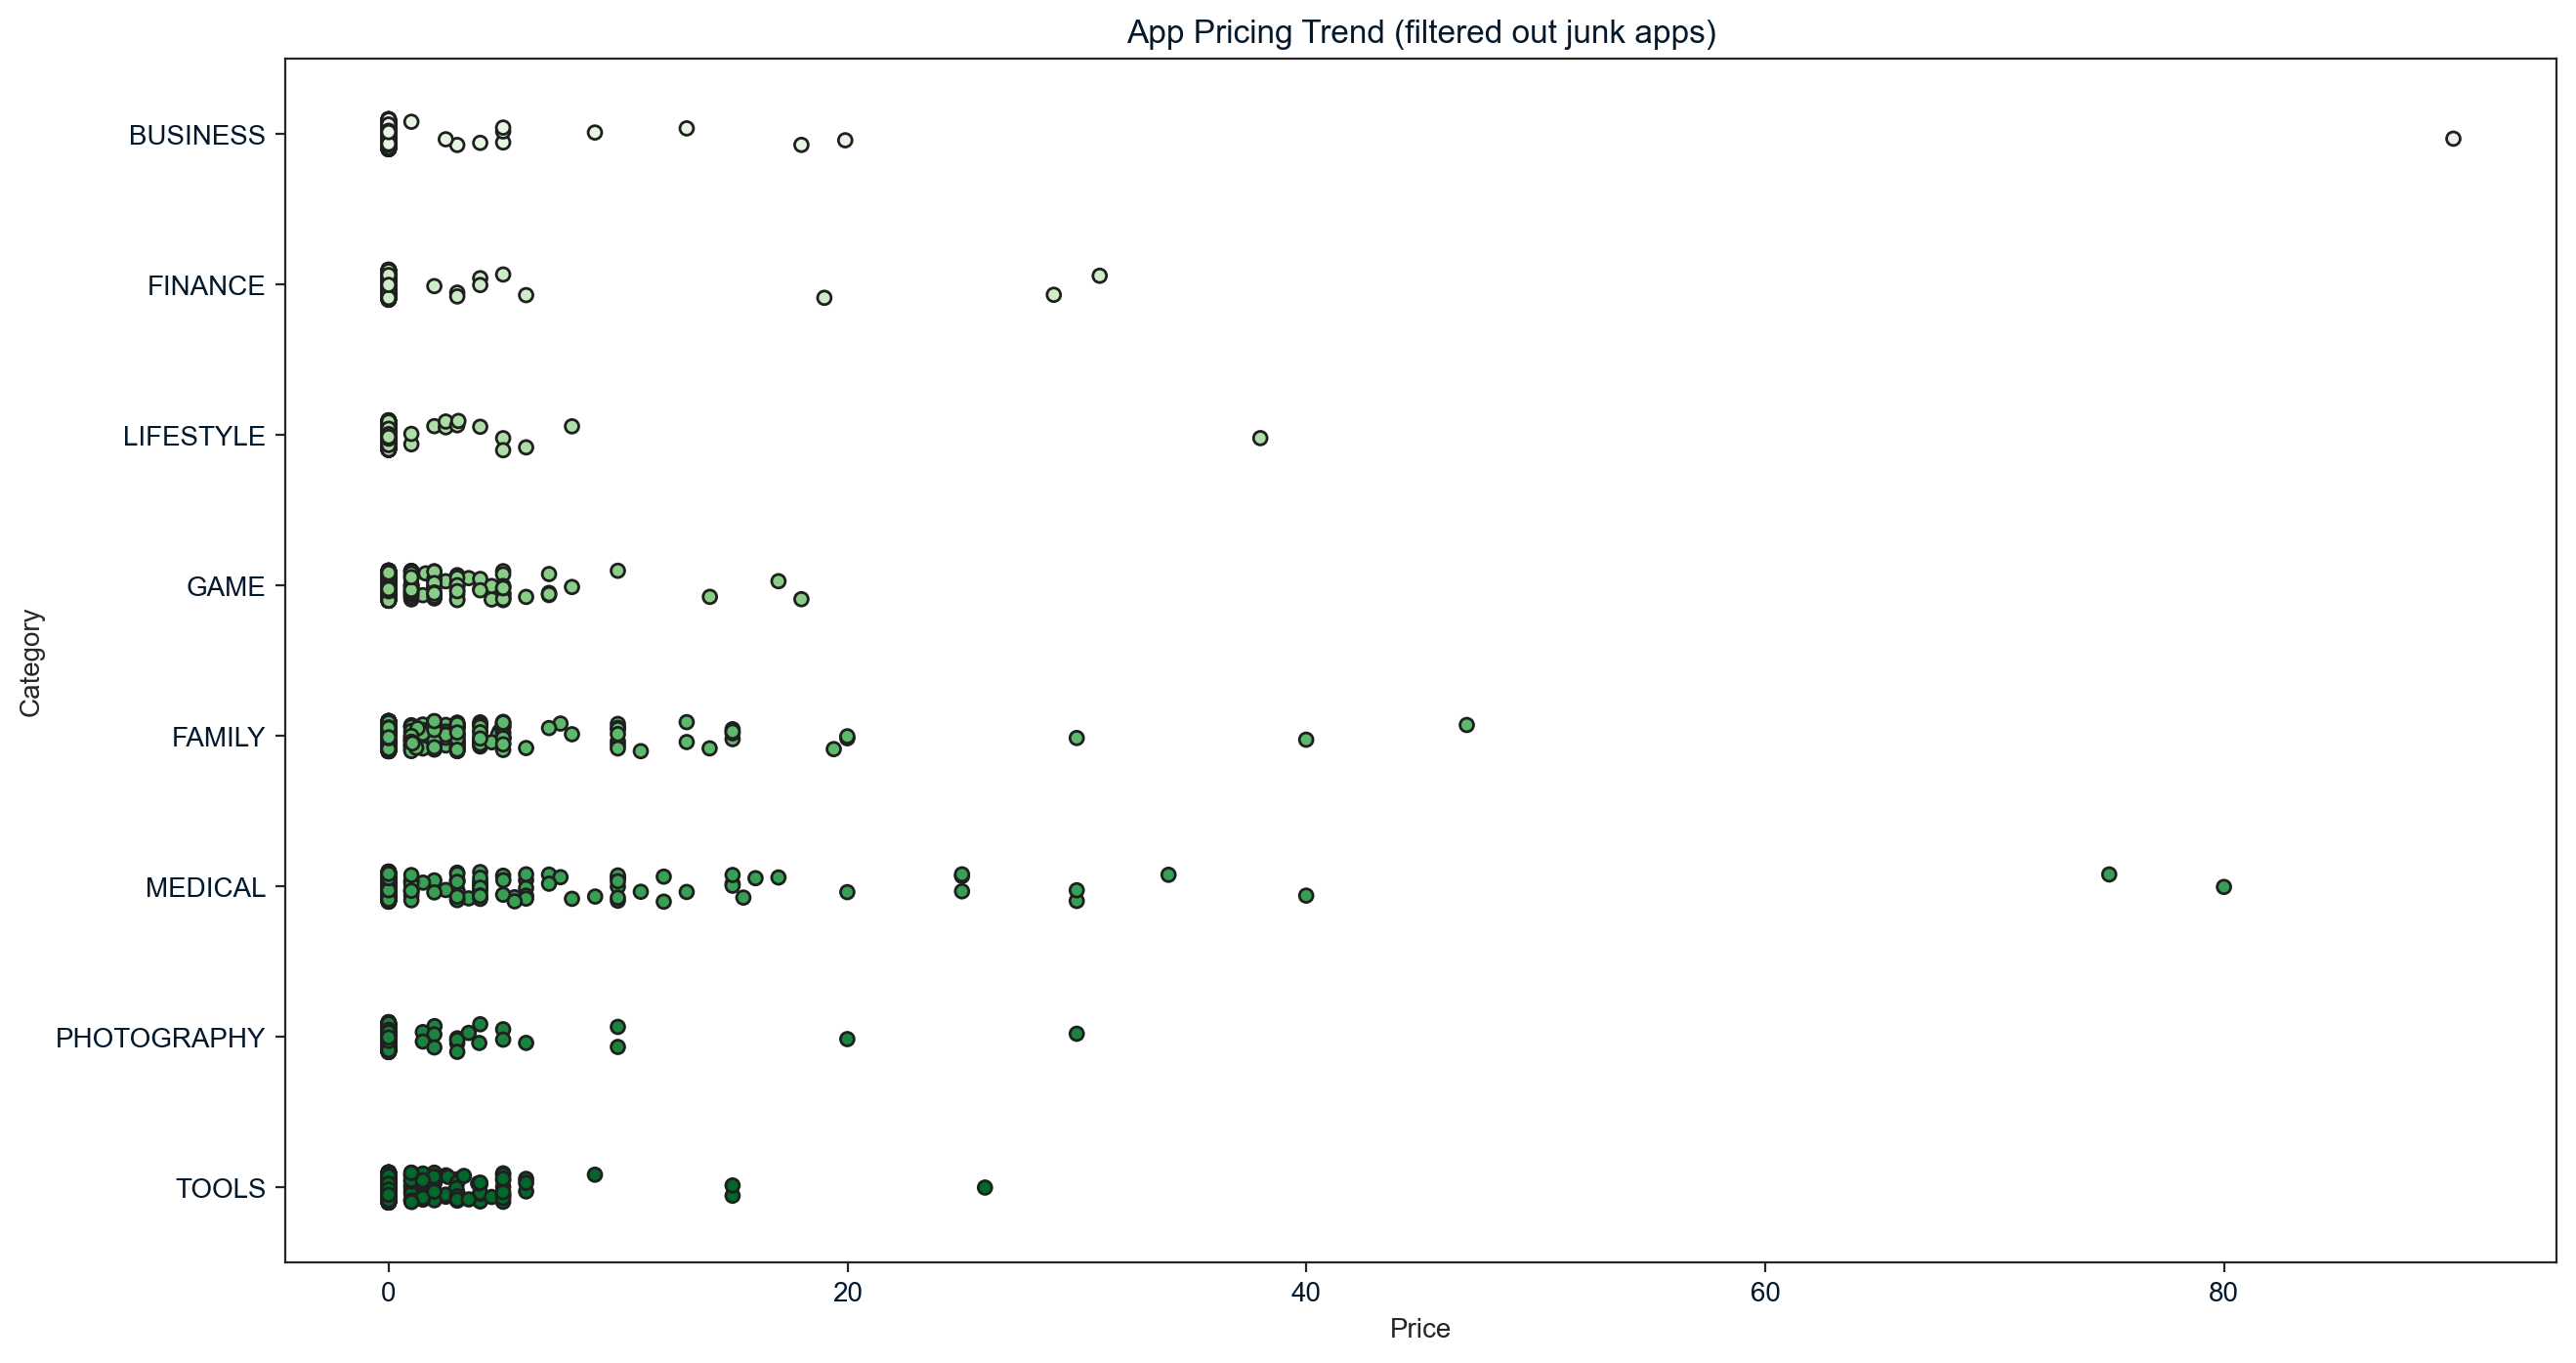

In [29]:
# Filter out junk apps
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

palette = sns.light_palette("green", as_cmap=True)
stripplot = sns.stripplot(x='Price', y='Category', data=apps_under_100, jitter=True, linewidth=1, palette='Greens')
ax.set_title('App Pricing Trend (filtered out junk apps)')

In [10]:
trace0 = go.Box(
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# The box plots for paid and free app downloads
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

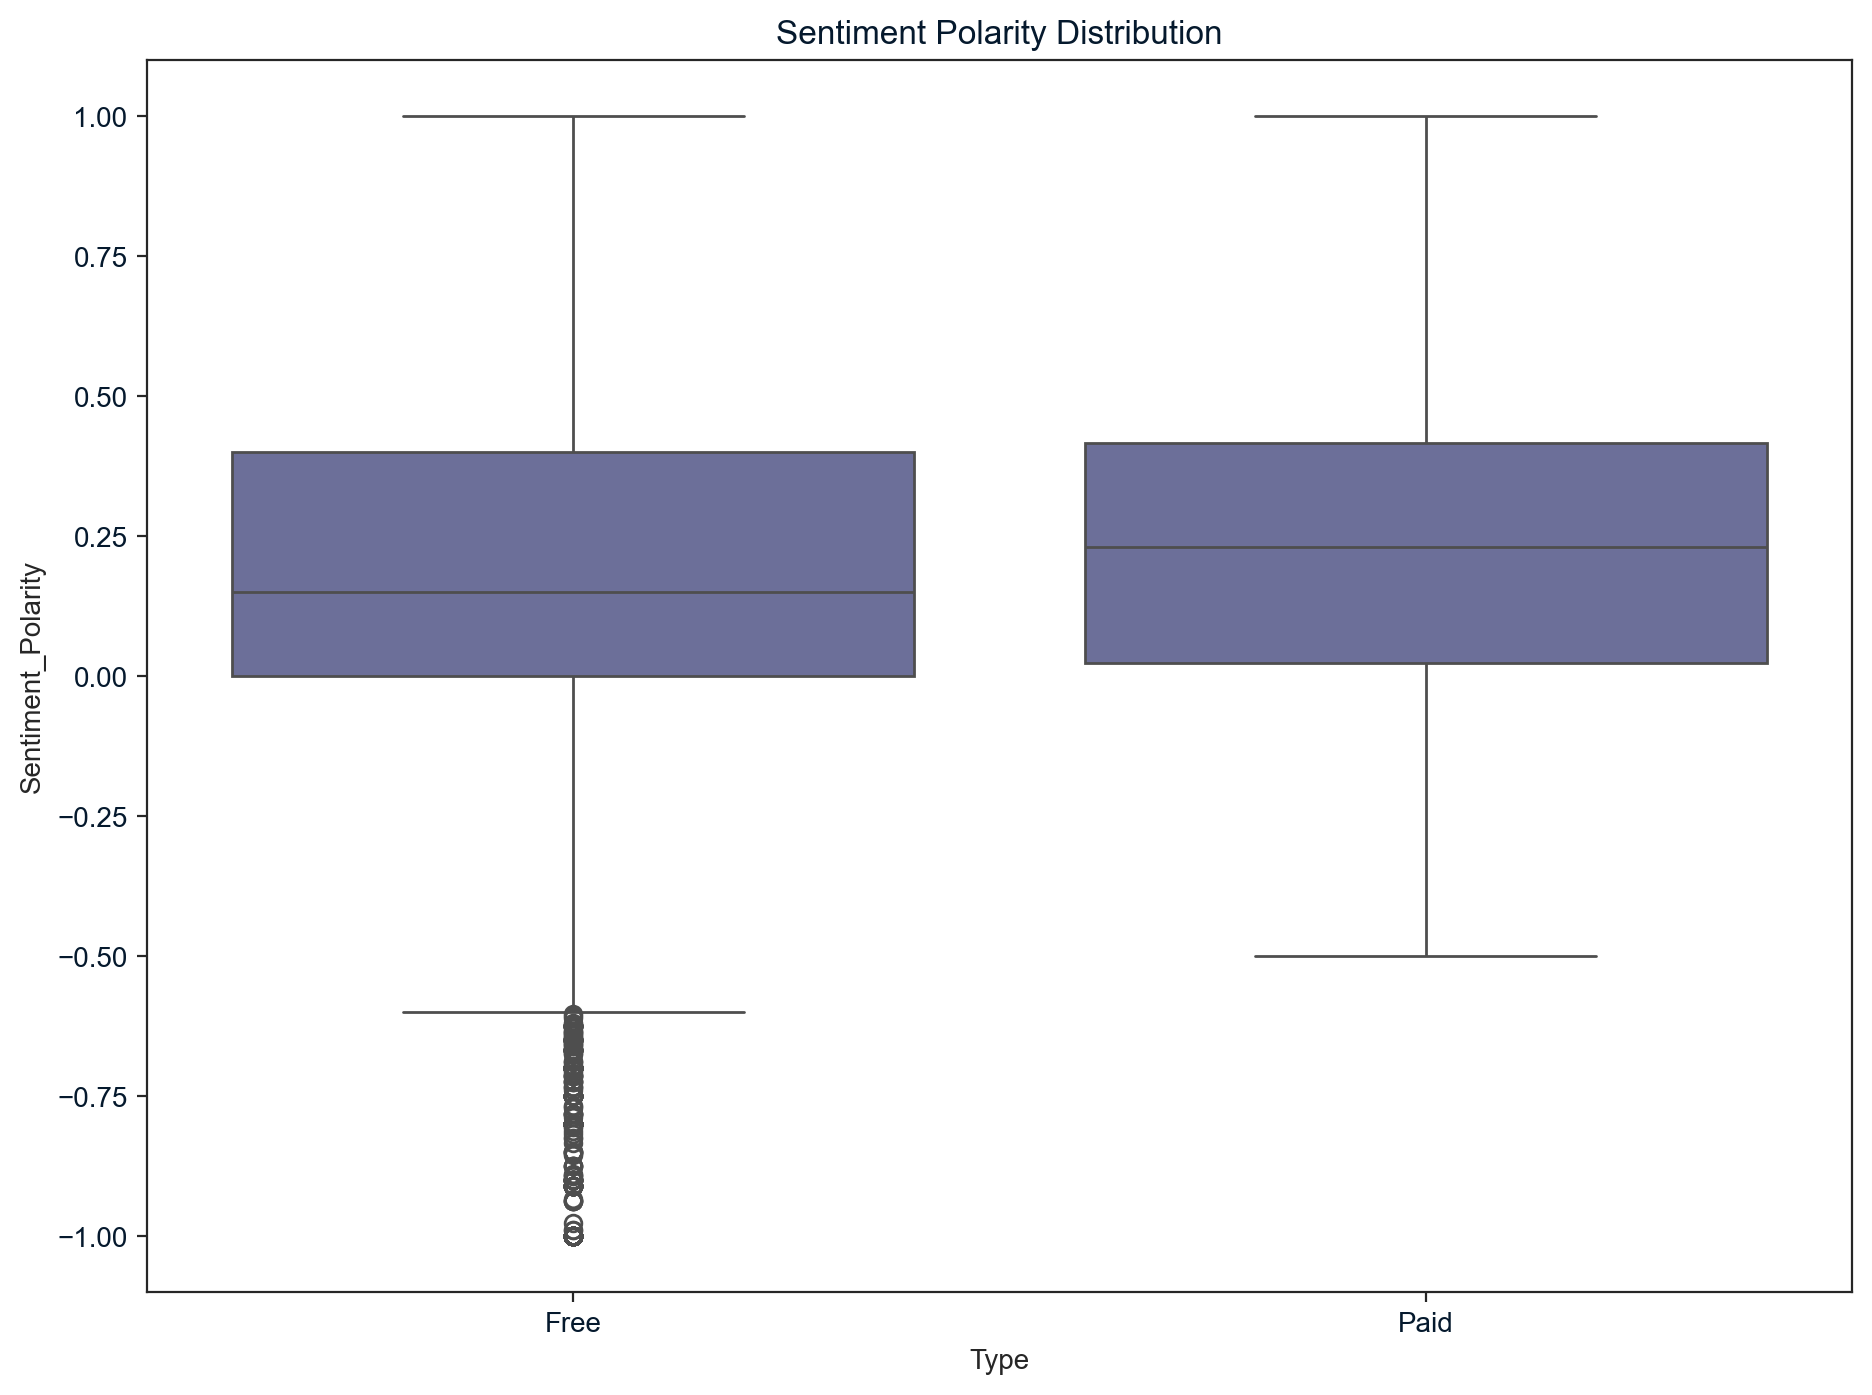

In [11]:
reviews = pd.read_csv('datasets/user_reviews.csv')

# Join two dataframes
merged_df = pd.merge(apps, reviews, on = 'App')
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# Sentiment Polarity Distribution for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

In [12]:
unique_categories = apps['Category'].unique()

print('Categories:')
for category in unique_categories:
    print(category)

Categories:
ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION
